
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [3]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for various functions including visualizations and charts
from matplotlib import pyplot as plt # used for plotting information
import pylab # used for interface functionality
import pingouin as pg # used for statistical analysis and data distribution

filepath = 'C:/Users/josie/Downloads/data for A1/MillerHadenData.csv'
df_mh = pd.read_csv(filepath)

#got the explanations from this site: https://learnpython.com/blog/python-libraries-for-data-science/

In [5]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.dtypes) #datatypes
df_mh.info() #information

#Given the following information, we can determine that the columns all contain ratio data, referring to the
#following website: https://www.scribbr.com/statistics/levels-of-measurement/#:~:text=Nominal%3A%20the%20data%20can%20only%20be%20categorized%20Ordinal%3A,ranked%2C%20evenly%20spaced%2C%20and%20has%20a%20natural%20zero.

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
Participant    int64
Abil           int64
IQ             int64
Home           int64
TV             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [13]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()
#print missing values for each column that has them
for column, count in missing_values.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing values")
    
# Check whether there is a data point for each participant on both variables
#in order to get an output - print a message on if missing values were found
if not missing_data:
    print("There is a data point for each participant on both variables")
else:
    print("Some participants are missing data points on one or more variables")

There is a data point for each participant on both variables


Normality:
Reading Ability:              W      pval  normal
Abil  0.948795  0.235491    True
IQ:            W      pval  normal
IQ  0.963604  0.490811    True


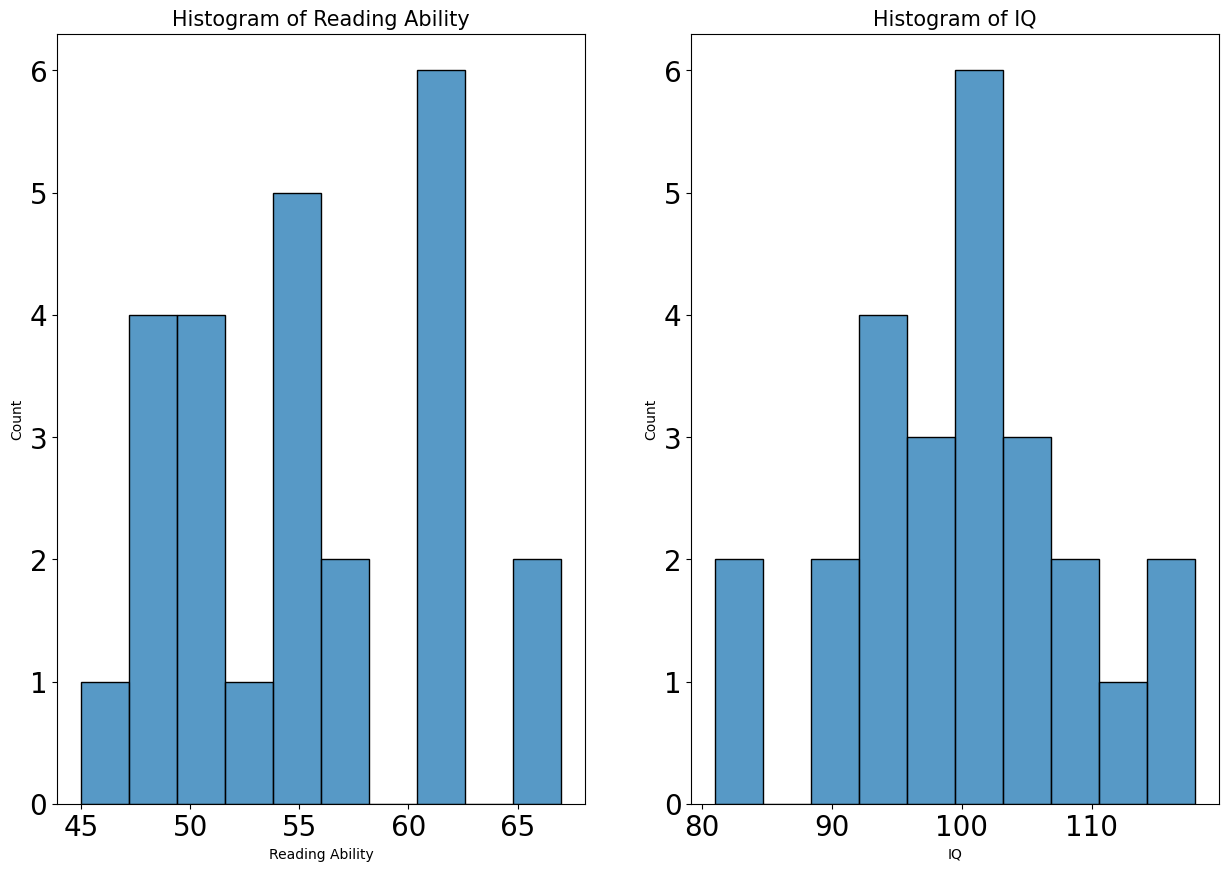

In [34]:
# Q1c (code):
# Check data distribution
# use pingouin to test for 'normality' or normal distribution by checking for p-values
print("Normality:")
print("Reading Ability:", pg.normality(df_mh['Abil']))
print("IQ:", pg.normality(df_mh['IQ']))
# choose a visualization using seaborn for data distributions - histograms are the ones I've chosen
plt.figure(figsize=(15, 10)) #set the size
plt.subplot(1, 2, 1) #set the parameters for rows columns and position
sns.histplot(df_mh['Abil'], kde=False, bins=10) #plot the histogram and set 10 intervals
plt.title('Histogram of Reading Ability', fontsize=15) #went back and adjusted fontsize after doing so in question 4
plt.xlabel('Reading Ability') #don't want it to say "Abil"

# Histogram for IQ
plt.subplot(1, 2, 2) #same parameters for comparison, change the position
sns.histplot(df_mh['IQ'], kde=False, bins=10) 
plt.title('Histogram of IQ', fontsize=15)

#execute the visualizations
plt.show()

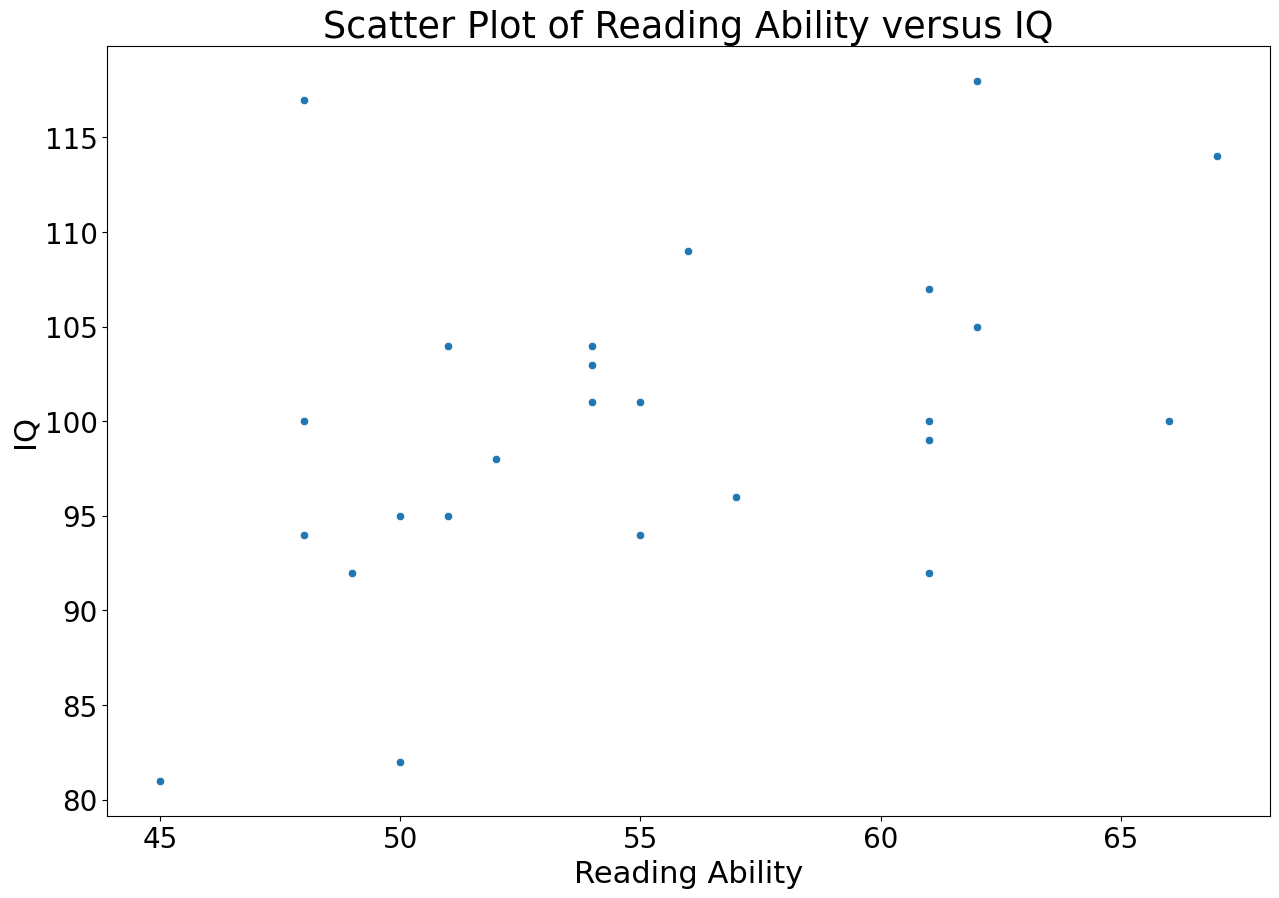

In [25]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(15, 10)) # setting the size parameters-width and height
sns.scatterplot(data=df_mh, x='Abil', y='IQ') #scatterplot function and label axes

plt.title('Scatter Plot of Reading Ability versus IQ') # title scatterplot
plt.xlabel('Reading Ability') # label the x-axis
plt.ylabel('IQ') # Label the y-axis

#exectute the scatterplot visualization
plt.show()

#font was too small - adjusted it using this using this resource: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 8 #set variable sizes
MEDIUM_SIZE = 10
plt.rcParams.update({'font.size': 22}) #fontsize of the tick labels
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels

Text(0, 0.5, 'IQ')

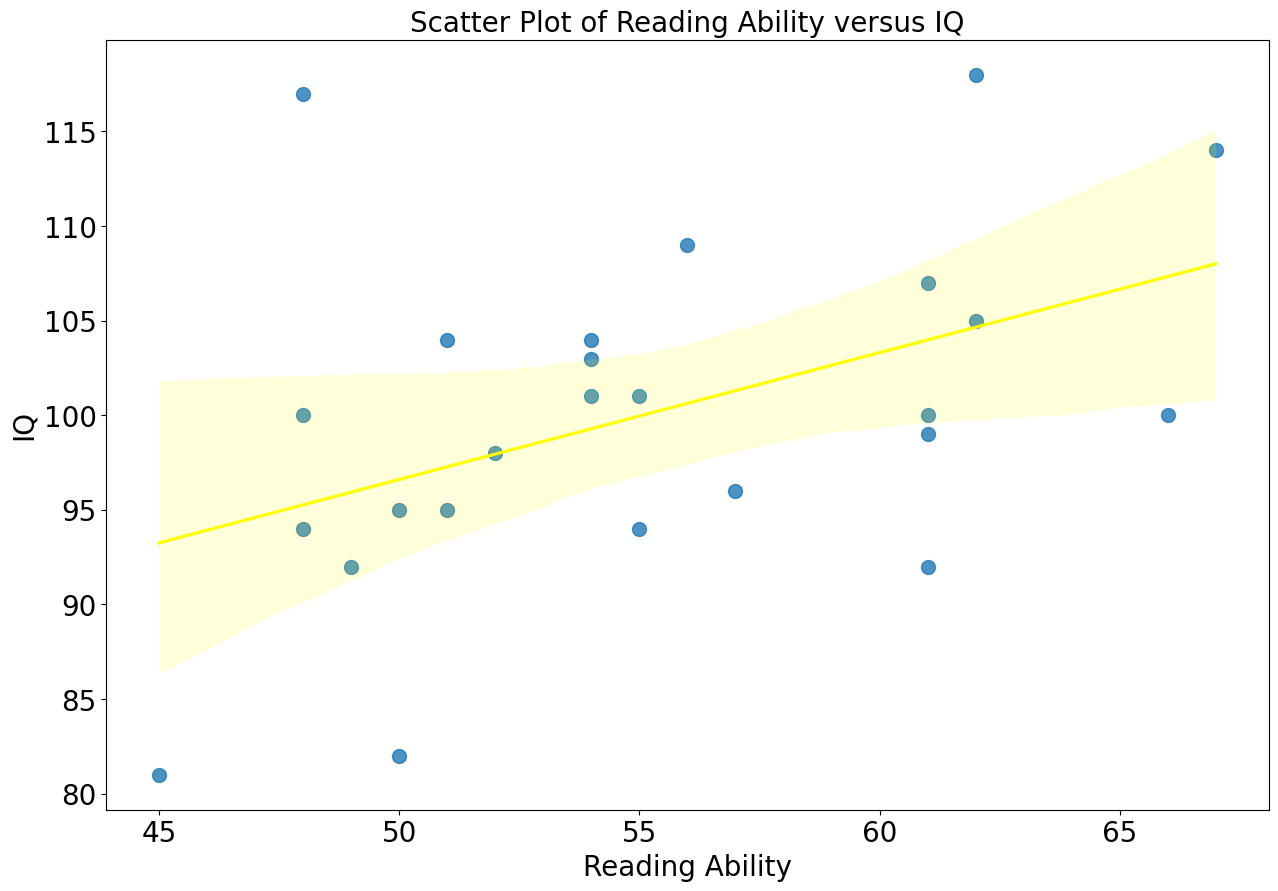

In [40]:
# Q1e (code):
# Correlation line
# use regplot function from seaborn
plt.figure(figsize=(15, 10))
sns.regplot(data=df_mh, x='Abil', y='IQ', scatter_kws={'s': 100}, line_kws={'color': 'yellow'}) # Adjusts the size of scatter points and line color

#copypaste labels from previous scatterplot but added in adjustments to the fontsizes again
plt.title('Scatter Plot of Reading Ability versus IQ', fontsize=20) # title scatterplot
plt.xlabel('Reading Ability', fontsize=20) # label the x-axis
plt.ylabel('IQ', fontsize=20) # Label the y-axis

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

Q2a (answer with words):

used this website as a resource: https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/

Spearman's correlation coefficient test is used commonly on ordinal variables.
Our datatype for both variables is ratio.

Pearson's is better for normally distributed data.
Our data is normally distributed.

Pearson's is better for consistent numbered values.
Reading Ability and IQ are simple and measurable with numbers.

Spearman's is better used if certain criteria aren't met, such as a linear relationship.
Reading Ability and IQ share a linear relationship.
 
Due to all the criteria satisfied above, Pearson's is the correlation coefficient test we should use.

In [43]:
# Q2b (code):
# use the pingouin function .corr to perform a correlation coefficient test between variables.
correlation_coefficient = pg.corr(df_mh['Abil'], df_mh['IQ'])

print(correlation_coefficient)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


Q2c (answer with words):

The correlation coefficent is listed under "r" and as you can see has a value of 0.45117, which is a positive correlation but not an extremely strong one - so, as one value increases the other tends to increase. Therefore, there is moderate-level evidence to suggest that as IQ increases, Reading Ability increases and vice versa.

The p-val is less than 0.05 and tests the null hypothesis that indicates that there is no significant relationship between Reading Ability and IQ - our p-val is 0.023593. This means that we can be confident that the null hypthesis is void and that the relationship does have significance.

Power being at a value of 0.640299 indicates further that there is significance in the relationship between Reading Ability and IQ. This is also moderately strong because 65% is not low, but not particularly high.

Overall, there is a positive relationship between Reading Ability and IQ that is moderately supported by the correlation coefficent test.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [44]:
# Q3a (answer in words):
# H0: There is no significant relationship between the amount of time spent reading at home per week and overall reading ability.
# H1：There is some significant relationship between the amount of time spent reading at home per week and reading ability.

In [49]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data analysis
from scipy.stats import chi2_contingency ##used for the Chi-square test

# Define the rounded average for Reading Ability and Home
average_readingability = round(df_mh['Abil'].mean())
average_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
# used lambda x: instead of def because I didn't want the results to be high and low for both rank_abil and rank_home - was too visually confusing and did not want to define 2 functions
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= average_readingability else 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Infrequent' if x <= average_home else 'Frequent')

print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [57]:
# Q3c (code):
# Construct Contingency Matrix
# use pandas and the crosstab function - found code here: https://www.geeksforgeeks.org/contingency-table-in-python/
contingency_matrix_all = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'], margins=False)

print("Contingency Matrix")
print(contingency_matrix_all)

# results were still visually confusing. made sure to format them by iterating through the rows by column label with value associated with frequency
for index, row in contingency_matrix_all.iterrows(): #row iteration
    Rank_Abil = index
    for col_label, value in row.items():
        Rank_Home = col_label
        print(f'"Individuals with "{Rank_Abil}" reading ability and "{Rank_Home}" total time spent reading at home appear {value} times.')

Contingency Matrix
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12
"Individuals with "High" reading ability and "Frequent" total time spent reading at home appear 8 times.
"Individuals with "High" reading ability and "Infrequent" total time spent reading at home appear 2 times.
"Individuals with "Low" reading ability and "Frequent" total time spent reading at home appear 3 times.
"Individuals with "Low" reading ability and "Infrequent" total time spent reading at home appear 12 times.


In [61]:
# Q3d (code):
# Perform the Chi-square test
# resource: https://www.askpython.com/python/examples/chi-square-test
stat, p, dof, expected = chi2_contingency(contingency_matrix_all) 
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 0.010785807794066234
Reject NULL HYPOTHESIS


Q3e (answer in words):

In the Chi-square test, I tested the null hypothesis and by extension the alternative hypothesis. If the value fell below 0.05, then the likelihood of the validity of the hypothesis was high (and therefore, the likelihood of the validity of the null hypothesis was low) - that there IS a statistical significance between Reading Ability and Time Spent at Home Reading per Week. Because the likelihood of there being NO correlation or significance between the variables is low, we can say that our hypothesis, "There is some significant relationship between the amount of time spent reading at home per week and reading ability", is supported.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [62]:
import pandas as pd # used for data wrangling
from scipy import stats # used for stat analysis
import numpy as np # used for mathematical operations
import matplotlib.pyplot as plt ## used to visualize the data in various plots
import seaborn as sns # also used to visualize

# Load the data - i copy and pasted the filepath and changed the .csv portion
df_evaluators = pd.read_csv('C:/Users/josie/Downloads/data for A1/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [65]:
# Q4a (code):
# Calculate mean and standard deviation for age
# mean
mean_age = df_evaluators['age'].mean()

# standard deviation using .std function
std_age = df_evaluators['age'].std()

print("The mean age of evaluators is:", mean_age)
print("The standard deviation of the age of the evaluators is:", std_age)

The mean age of evaluators is: 30.852941176470587
The standard deviation of the age of the evaluators is: 6.238358141327351


In [68]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators['sex'].value_counts()

# find out the counts of male and female evaluators. male is 1.0 on the df and female is 2.0
male_count = sex_counts.get(1.0, 0)
female_count = sex_counts.get(2.0, 0)

# print in the proper format
print("Number of female evaluators:", female_count)
print("Number of male evaluators:", male_count)

Number of female evaluators: 30
Number of male evaluators: 4


In [69]:
# test to see if this is true and how many NaN values there are ... looks correct!
print(df_evaluators)

    eval_id condition   age  sex
0         1  listened  29.0  2.0
1         2  listened  27.0  2.0
2         3  listened  27.0  2.0
3         4      read  40.0  2.0
4         5      read  32.0  2.0
5         6      read  24.0  2.0
6         7  listened  29.0  2.0
7         8      read  23.0  2.0
8         9  listened  28.0  2.0
9        10      read  34.0  2.0
10       11      read  33.0  2.0
11       12  listened  28.0  2.0
12       13  listened  28.0  2.0
13       14      read  25.0  2.0
14       15      read  29.0  2.0
15       16  listened  28.0  2.0
16       17  listened  48.0  2.0
17       18  listened  31.0  1.0
18       19      read  27.0  2.0
19       20      read  24.0  2.0
20       21      read  32.0  2.0
21       22      read  31.0  1.0
22       23      read   NaN  NaN
23       24  listened   NaN  NaN
24       25  listened  24.0  2.0
25       26  listened   NaN  NaN
26       27      read  32.0  2.0
27       28  listened   NaN  NaN
28       29  listened  38.0  2.0
29       3

###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [72]:
# Load ratings data
# copied filepath again changing the .csv 
df_ratings = pd.read_csv('C:/Users/josie/Downloads/data for A1/ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [108]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
# made variable name specific_categories and created an empty list
specific_categories = ["thoughtful", "competent", "intelligent"]
specific_categories_df = []
#filter the dataframe and make a new one using a for loop
for category in df_ratings["Category"]:
    if category in specific_categories:
        specific_categories_df.append(category)
specific_categories_df = df_ratings[df_ratings["Category"].isin(specific_categories)]
#test below
#print(specific_categories_df.head())

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
mean_intellect_rating = df_ratings.groupby('eval_id')['Rating'].mean()
mean_intellect_rating_df = mean_intellect_rating.reset_index()
#test below
#print(mean_intellect_rating_df)

# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect_rating_df['Category'] = 'intellect'
intellect_mean = mean_intellect_rating_df

#test below
#print(mean_intellect_rating_df)

# Create a DataFrame for 'impression' and 'hire' ratings
other_specific_categories = ["impression", "hire"]
other_specific_categories_df = []
for category in df_ratings["Category"]:
    if category in other_specific_categories:
        other_specific_categories_df.append(category)
other_specific_categories_df = df_ratings[df_ratings["Category"].isin(other_specific_categories)]
other_ratings = other_specific_categories_df
# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
# simply used concat function
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
combined_df = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
necessary_columns = combined_df[['eval_id', 'Category', 'condition', 'Rating']]

# Arrange by 'eval_id' and 'Category'
ratings2 = necessary_columns.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,condition,Rating
40,1,hire,listened,6.000000
39,1,impression,listened,7.000000
0,1,intellect,listened,6.200000
42,2,hire,listened,4.000000
41,2,impression,listened,4.666667


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [109]:
# Q6a (answer in words):
# Null hypothesis: There is no notable correlation between strength of evaluators' ratings for the individual categories of "hire", "impression", or "intellect" based on the condition of reading or listening. 

# Alternative hypothesis: There are some notable differences between strength of evaluators' ratings for the individual categories of "hire", "impression", or "intellect" based on the condition of reading or listening.

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

Q6b (answer in words):
Which t-test should we choose, one-tail or two-tail? Explian why.

Used this resource: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

We should use a two-tailed t-test for this because we are not concerned with what direction any significance/correlation is towards. We are only concerned with whether there is any significance or correlation.  

Q6c (answer in words):

What are the independent variable and the dependent variable here?

The independent variable is the "condition" or, namely, the pitches that were listened to and the pitches that were read. The dependent variable is the ratings given by evaluators based on traits - namely the chosen ones of intellect, hire, and impression.

This is because for the purposes of these hypotheses, the strength of ratings hangs on the condition of being read or listened to.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [134]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for: shapiro for normality test, levene for 'homogeneity of variances', ttest_ind for t-test

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby('condition')['Rating'].describe()

#quick test below
#print(ratings_desc)

# Test for normal distribution (Shapiro-Wilk test)
# groupby to isolate these 2 columns and apply the shapiro test - use lambda for simplicity
shapiro_results = ratings2.groupby('condition')['Rating'].apply(lambda x: shapiro(x)[1])

# Test for homogeneity of variances (Levene's test)
#use ratings2 dataframe. apply the test on both conditions separately.
levene_results = levene(ratings2[ratings2['condition'] == 'listened']['Rating'], 
                        ratings2[ratings2['condition'] == 'read']['Rating'])

# Independent t-tests
ttest_results = {}

for trait in ratings2['Category'].unique():
    listened_ratings = ratings2[(ratings2['Category'] == trait) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == trait) & (ratings2['condition'] == 'read')]['Rating']
    ttest_results[trait] = ttest_ind(listened_ratings, read_ratings)


#print results in a nicely formatted way - without format is an eyesore
print("Descriptive statistics for each condition:")
print(ratings_desc)

print("\nP-values from Shapiro-Wilk test:")
print(shapiro_results)

print("\nResults from Levene's test:")
print(levene_results)

print("\nResults from each individual t-test:")
for trait, result in ttest_results.items():
    print(f"{trait}: {result}")

Descriptive statistics for each condition:
           count      mean       std  min   25%       50%  75%       max
condition                                                               
listened    63.0  5.400000  1.984636  0.0  4.00  5.533333  7.0  8.733333
read        54.0  3.514815  2.093232  0.0  1.85  3.466667  5.0  7.333333

P-values from Shapiro-Wilk test:
condition
listened    0.170918
read        0.034647
Name: Rating, dtype: float64

Results from Levene's test:
LeveneResult(statistic=0.616831164422984, pvalue=0.43384239292430216)

Results from each individual t-test:
hire: Ttest_indResult(statistic=2.620100218173143, pvalue=0.012674511839824125)
impression: Ttest_indResult(statistic=2.850766179025179, pvalue=0.007091060616710596)
intellect: Ttest_indResult(statistic=3.428665207975264, pvalue=0.0015032325879652676)


Q7b (answer in words):

Descriptive statistics provide summaries of the count, mean, standard deviation, minimum, maximum, and the distribution of data amongst the quartiles 25, 50, and 75. This helps us to see any statistical significances and the general distribution.

P-values from the Shapiro-Wilk test tell us that there is some significance for our hyptheses if a value falls below 0.05. Since the p-value for the "read" condition is below 0.05, that means that there is some statistical significance between the ratings and the "read" condition - for "listened" there is none. This supports the overall hypothesis though because there is significance to some degree.

Levene's test resulted in a p-value of ~0.433. This is also not below 0.05. This test is conducted to test the "homogeneity of variables" and our null hypothesis assumes that the variables are homogeneous - e.g. no notable differences or deviations and the variances won't differ. This means that while there is a difference in variances it is not significant since the p-value is high and this is associated with equal variances.

The individual t-tests compare the variables under "category" based on their "rating" in different groupings to see if there are again any notable differences. The results are all lower than the standard 0.05 and this means that there are significant changes in results/overall ratings based on the condition of being either listened to or read for these three selected traits under "category".